# Regularized Linear Models
## Data Science Seminar - Feb 28, 2019
## Amirhessam Tahmassebi, PhD
### Cerner Intelligence Insights

In [1]:
# Loading Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso, Ridge
import glmnet
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, scale
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
sns.set()
%matplotlib inline

# Simple Linear Regression

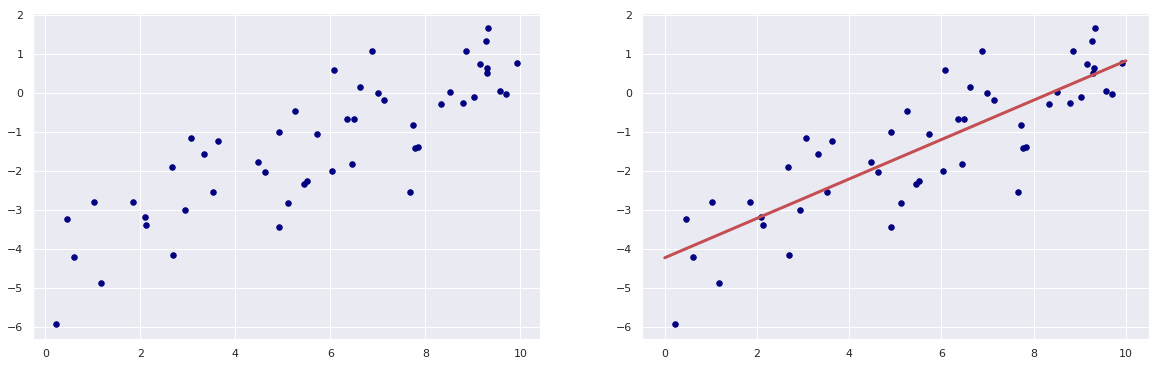

In [2]:
# defining random number generator with a fixed seed for reproduing the results
rng = np.random.RandomState(seed = 1367)

# defining x and y
x = 10 * rng.rand(50)
y = 0.5 * x - 4 + rng.randn(50)

# scatter plot of x and y
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
plt.scatter(x, y, c = "navy", s = 30);

# defining the model and fitting the model to the data
model = LinearRegression(fit_intercept = True)
model.fit(x[:, np.newaxis], y)

# fitted line to the data
xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])
# plotting the data and the line
plt.subplot(1,2,2)

plt.scatter(x, y, c = "navy", s = 30)
plt.plot(xfit, yfit, "r", lw = 3);

<Figure size 720x720 with 0 Axes>

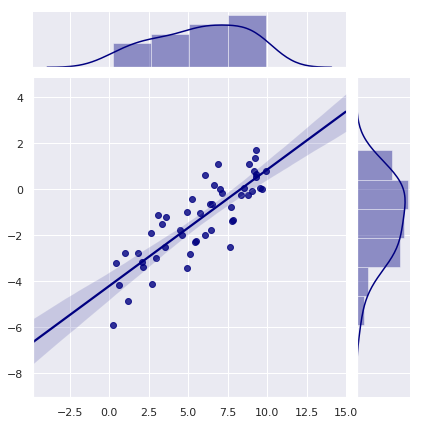

In [3]:
# Joint plot using SEABORN
plt.figure(figsize = (10,10))
sns.jointplot(x = x, y = y, kind = "reg", color = "navy")
plt.show()

# Nonlinear Transformation

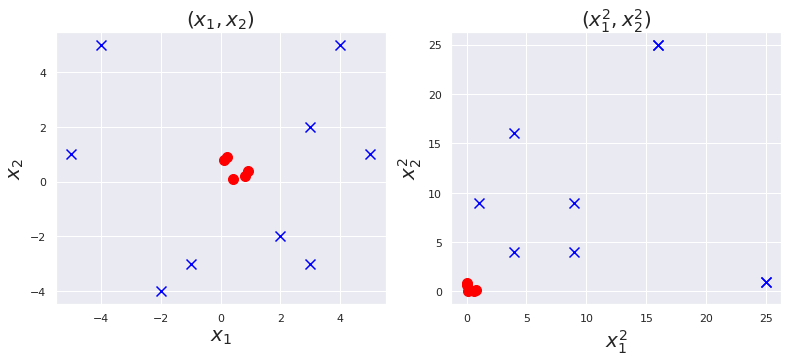

In [30]:
# (x1, x2) ---> (x1^2 , x2^2)
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
plt.scatter([0.1, 0.2, 0.4, 0.8, 0.9], [0.8, 0.9, 0.1, 0.2, 0.4] , marker="o", s = 100, c = "red")
plt.scatter([-1, -2, 3, 4, 5, -4, -5, 2, 3], [-3, -4, 2, 5, 1, 5, 1, -2, -3] , marker="x", s = 100, c = "blue")
plt.title(r"$(x_1, x_2)$", fontsize = 20)
plt.xlabel(r"$x_1$", fontsize = 20)
plt.ylabel(r"$x_2$", fontsize = 20)

plt.subplot(1,2,2)
plt.scatter([x**2 for x in [0.1, 0.2, 0.4, 0.8, 0.9]], [x**2 for x in [0.8, 0.9, 0.1, 0.2, 0.4]], marker="o", s = 100, c = "red")
plt.scatter([x**2 for x in [-1, -2, 3, 4, 5, -4, -5, 2, 3]], [x**2 for x in [-3, -4, 2, 5, 1, 5, 1, -2, -3]], marker="x", s = 100, c = "blue")
plt.title(r"$(x_1^2, x_2^2)$", fontsize = 20)
plt.xlabel(r"$x_1 ^2$", fontsize = 20)
plt.ylabel(r"$x_2 ^2$", fontsize = 20)
plt.show()

# Polynomial basis

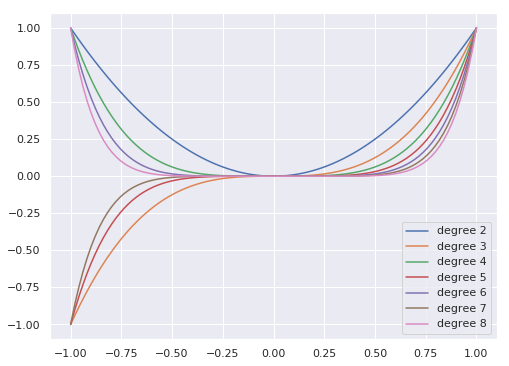

In [4]:
x = np.linspace(-1,1, 100)
plt.figure(figsize=(8,6))
for degree in [2,3, 4, 5, 6, 7, 8]:
    plt.plot(x, x**degree, label = F"degree {degree}")
    plt.legend(loc = 0)
plt.show()


# Noisy Sin(x) using Polynomial basis functions and OLS

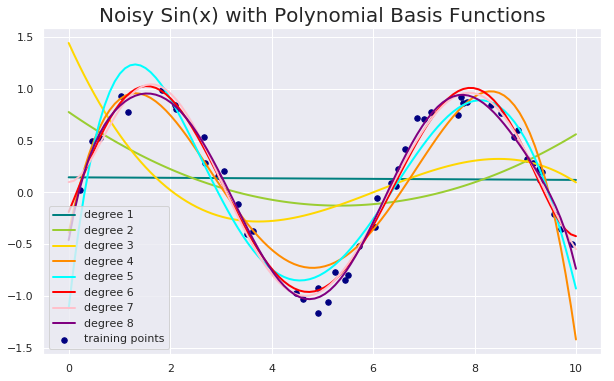

In [5]:
# data x and y
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

# generate points used to plot
x_plot = np.linspace(0, 10, 100)

# generate points and keep a subset of them
rng = np.random.RandomState(1367)

x = 10 * rng.rand(50)
y = np.sin( x) + 0.1 * rng.randn(50)


# create matrix versions of these arrays
X = x[:, np.newaxis]
X_plot = x_plot[:, np.newaxis]

colors = ["teal", "yellowgreen", "gold", "darkorange", "cyan", "red", "pink", "purple"]
lw = 2
plt.figure(figsize = (10,6))
plt.scatter(x, y, color="navy", s=30, marker="o", label="training points")

for count, degree in enumerate([1, 2, 3, 4, 5, 6, 7, 8]):
    model = make_pipeline(PolynomialFeatures(degree = degree), LinearRegression())
    model.fit(X, y)
    y_plot = model.predict(X_plot)
    plt.plot(x_plot, y_plot, color=colors[count], linewidth=lw,
             label="degree %d" % degree)
plt.legend(loc="lower left")
plt.title("Noisy Sin(x) with Polynomial Basis Functions", fontsize = 20)
plt.show()


# Noisy Sin(x) using Polynomial degree 25 and LASSO

/home/amirhessam/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/amirhessam/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/amirhessam/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


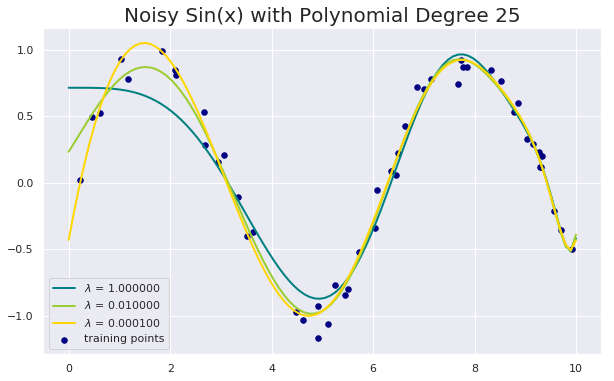

In [6]:
# data x and y
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

# generate points used to plot
x_plot = np.linspace(0, 10, 100)

# generate points and keep a subset of them
rng = np.random.RandomState(1367)

x = 10 * rng.rand(50)
y = np.sin( x) + 0.1 * rng.randn(50)


# create matrix versions of these arrays
X = x[:, np.newaxis]
X_plot = x_plot[:, np.newaxis]

colors = ["teal", "yellowgreen", "gold", "darkorange", "cyan", "red", "pink", "purple"]
lw = 2
plt.figure(figsize = (10,6))
plt.scatter(x, y, color="navy", s=30, marker="o", label="training points")

degree = 25
for count, alpha in enumerate([1.0, 1e-2, 1e-4]):
    model = make_pipeline(PolynomialFeatures(degree = degree), Lasso(alpha = alpha, max_iter=1e6))
    model.fit(X, y)
    y_plot = model.predict(X_plot)
    plt.plot(x_plot, y_plot, color=colors[count], linewidth=lw,
             label=r"$\lambda$ = %f" % alpha)

plt.legend(loc="lower left")
plt.title(F"Noisy Sin(x) with Polynomial Degree {degree}", fontsize = 20)
plt.show()


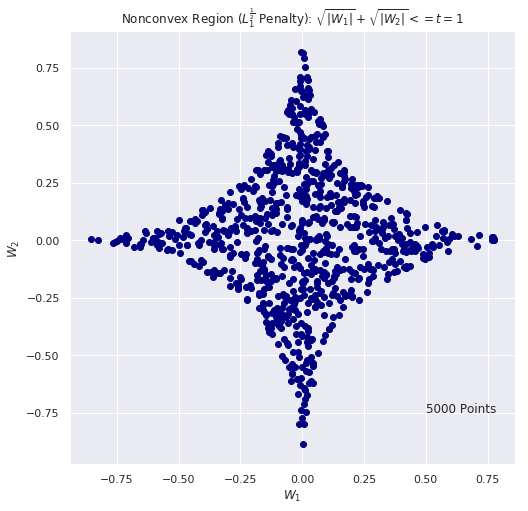

In [44]:
# Nonconvex REGION: criteria |w1|^0.5 + |w2|^0.5 <= t using Monte Carlo
# for (a,b) = (-1, 1) we have t = 1
n_iter = 5000
t = 1
w1_list = []
w2_list = []
for i in range(n_iter):
    w1 = 2.0 * np.random.random() - 1.0
    w2 = 2.0 * np.random.random() - 1.0
    if(np.abs(w1) ** 0.5 + np.abs(w2) **0.5 <= t):
        w1_list.append(w1)
        w2_list.append(w2)
        
plt.figure(figsize=(8, 8))        
plt.scatter(w1_list, w2_list, c="navy")
plt.title(r"Nonconvex Region ($L_1^ \frac{1}{2}$ Penalty): $\sqrt{|W_1|} + \sqrt{|W_2|} <= t = 1$")
plt.xlabel(r"$W_1$")
plt.ylabel(r"$W_2$")
plt.text(0.5, -.75, F"{n_iter} Points", fontsize = 12)
plt.show()

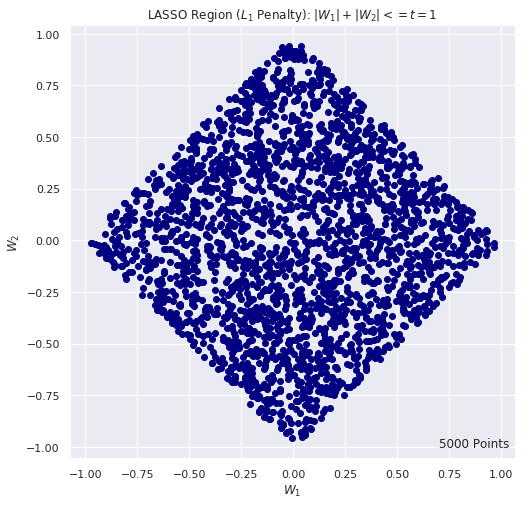

In [38]:
# LASSO REGION: criteria |w1| + |w2| <= t using Monte Carlo
# for (a,b) = (-1, 1) we have t = 1
n_iter = 5000
t = 1
w1_list = []
w2_list = []
for i in range(n_iter):
    w1 = 2.0 * np.random.random() - 1.0
    w2 = 2.0 * np.random.random() - 1.0
    if(np.abs(w1) + np.abs(w2) <= t):
        w1_list.append(w1)
        w2_list.append(w2)
        
plt.figure(figsize=(8, 8))        
plt.scatter(w1_list, w2_list, c="navy")
plt.title(r"LASSO Region ($L_1$ Penalty): $|W_1| + |W_2| <= t = 1$")
plt.xlabel(r"$W_1$")
plt.ylabel(r"$W_2$")
plt.text(0.7, -1, F"{n_iter} Points", fontsize = 12)
plt.show()

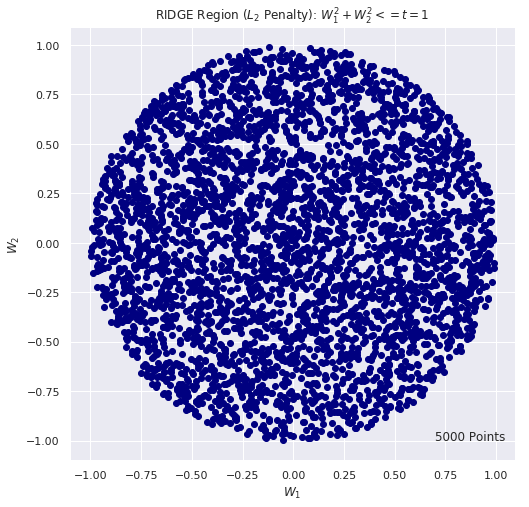

In [39]:
# RIDGE REGION: criteria w1^2 + w2^2 <= t using Monte Carlo
# for (a,b) = (-1, 1) we have t = 1
n_iter = 5000
t = 1
w1_list = []
w2_list = []
for i in range(n_iter):
    w1 = 2.0 * np.random.random() - 1.0
    w2 = 2.0 * np.random.random() - 1.0
    if(w1**2 + w2**2 <= t):
        w1_list.append(w1)
        w2_list.append(w2)
        
plt.figure(figsize=(8, 8))        
plt.scatter(w1_list, w2_list, c="navy")
plt.title(r"RIDGE Region ($L_2$ Penalty): $W_1^2 + W_2 ^2 <= t =1$")
plt.xlabel(r"$W_1$")
plt.ylabel(r"$W_2$")
plt.text(0.7, -1, F"{n_iter} Points", fontsize = 12)
plt.show()

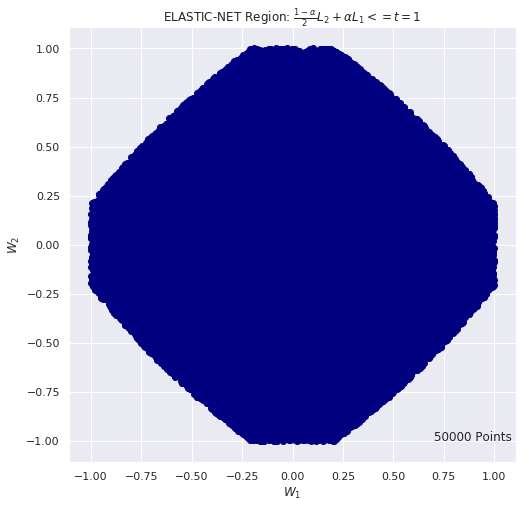

In [9]:
# Elastic Net REGION: criteria (1-alpha)/2 using Monte Carlo
# for (a,b) = (-1, 1) we have t = 1
n_iter = 50000
t = 1
alpha = 0.7
w1_list = []
w2_list = []
for i in range(n_iter):
    w1 = 2.0 * np.random.random() - 1.0
    w2 = 2.0 * np.random.random() - 1.0
    if( (1-alpha)/2. * (w1**2 + w2**2) + alpha * (np.abs(w1) + np.abs(w2)) ) <= t:
        w1_list.append(w1)
        w2_list.append(w2)
        
plt.figure(figsize=(8, 8))        
plt.scatter(w1_list, w2_list, c="navy")
plt.title(r"ELASTIC-NET Region: $\frac{1-\alpha}{2} L_2 + \alpha L_1 <= t =1$")
plt.xlabel(r"$W_1$")
plt.ylabel(r"$W_2$")
plt.text(0.7, -1, F"{n_iter} Points", fontsize = 12)

plt.show()

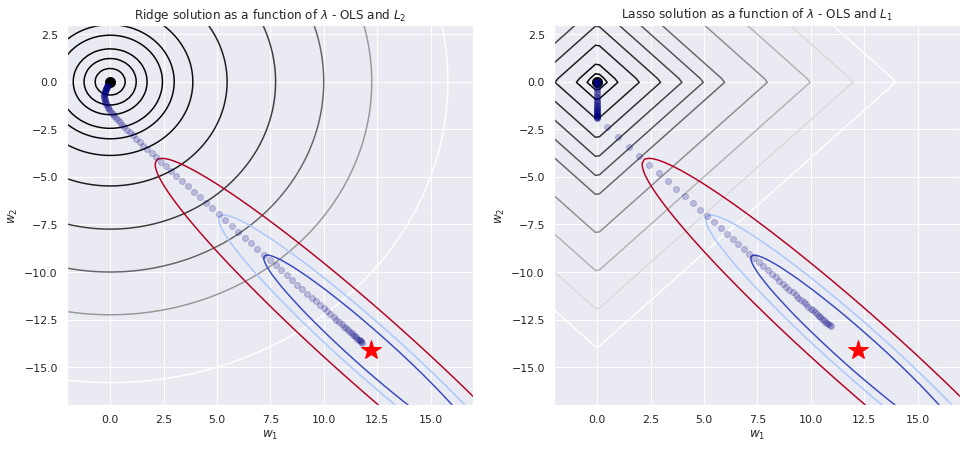

In [10]:

def costfunction(X,y,theta):
    '''OLS cost function'''
    #Initialisation of useful values 
    m = np.size(y)
    
    #Cost function in vectorized form
    h = X @ theta
    J = float((1./(2*m)) * (h - y).T @ (h - y));    
    return J;


def closed_form_solution(X,y):
    '''Linear regression closed form solution'''
    return np.linalg.inv(X.T @ X) @ X.T @ y
    
def closed_form_reg_solution(X,y,lamda = 10): 
    '''Ridge regression closed form solution'''
    m,n = X.shape
    I = np.eye((n))
    return (np.linalg.inv(X.T @ X + lamda * I) @ X.T @ y)[:,0]

def cost_l2(x,y):
    '''L2 cost functiom'''
    return x**2 + y**2

def cost_l1(x,y):
    '''L1 cost function'''
    return np.abs(x) + np.abs(y)

##########################################
#Creating the dataset (as previously)
x = np.linspace(0,1,40)
noise = 1*np.random.uniform(  size = 40)
y = np.sin(x * 1.5 * np.pi ) 
y_noise = (y + noise).reshape(-1,1)

#Subtracting the mean so that the y's are centered
y_noise = y_noise - y_noise.mean()
X = np.vstack((2*x,x**2)).T

#Nornalizing the design matrix to facilitate visualization
X = X / np.linalg.norm(X,axis = 0)

#######################################
lambda_range = np.logspace(0,4,num = 100)/1000
w_0_list_reg_l2 = []
w_1_list_reg_l2 = []

for l in lambda_range:
    t0, t1 = closed_form_reg_solution(X,y_noise,l)
    w_0_list_reg_l2.append(t0)
    w_1_list_reg_l2.append(t1)
    
lambda_range = np.logspace(0,2,num = 100)/1000
w_0_list_reg_l1 = []
w_1_list_reg_l1 = []

for l in lambda_range:
    model_sk_reg = Lasso(alpha=l, fit_intercept=False)
    model_sk_reg.fit(X,y_noise)
    t0, t1 = model_sk_reg.coef_
    w_0_list_reg_l1.append(t0)
    w_1_list_reg_l1.append(t1)
###################################
#Setup of meshgrid of w values
xx, yy = np.meshgrid(np.linspace(-2,17,100),np.linspace(-17,3,100))

#Computing the cost function for each w combination
zz_l2 = np.array(  [cost_l2(xi, yi )for xi, yi in zip(np.ravel(xx), np.ravel(yy)) ] ) #L2 function

zz_l1 = np.array(  [cost_l1(xi, yi )for xi, yi in zip(np.ravel(xx), np.ravel(yy)) ] ) #L1 function

zz_ls = np.array(  [costfunction(X, y_noise.reshape(-1,1),np.array([t0,t1]).reshape(-1,1)) 
                     for t0, t1 in zip(np.ravel(xx), np.ravel(yy)) ] ) #least square cost function

#Reshaping the cost values    
Z_l2 = zz_l2.reshape(xx.shape)
Z_ls = zz_ls.reshape(xx.shape)
Z_l1 = zz_l1.reshape(xx.shape)

#Defining the global min of each function
min_ls = np.linalg.inv(X.T@X)@X.T@y_noise
min_l2 = np.array([0.,0.])
min_l1 = np.array([0.,0.])

#Plotting the contours - L2 
fig = plt.figure(figsize = (16,7))
ax = fig.add_subplot(1, 2, 1)
ax.contour(xx, yy, Z_l2, levels = [.5,1.5,3,6,9,15,30,60,100,150,250],  cmap = "gray")
ax.contour(xx, yy, Z_ls, levels = [.01,.06,.09,.11,.15], cmap = "coolwarm")
ax.set_xlabel(r"$w_1$")
ax.set_ylabel(r"$w_2$")
ax.set_title("Ridge solution as a function of $\\lambda$ - OLS and $L_2$ ")

#Plotting the minimum - L2 
ax.plot(min_ls[0],min_ls[1], marker = "*", color = "red", markersize = 20)
ax.plot(0,0, marker = "o", color = "black", markersize = 10)

#Plotting the path of L2 regularized minimum
ax.plot(w_0_list_reg_l2,w_1_list_reg_l2, linestyle = "none", marker = "o", color = "navy", alpha = .2)


#Plotting the contours - L1 
ax = fig.add_subplot(1, 2, 2)
ax.contour(xx, yy, Z_l1, levels = [.5,1,2,3,4,5,6,8,10,12,14],  cmap = "gray")
ax.contour(xx, yy, Z_ls, levels = [.01,.06,.09,.11,.15], cmap = "coolwarm")
ax.set_xlabel(r"$w_1$")
ax.set_ylabel(r"$w_2$")
ax.set_title("Lasso solution as a function of $\\lambda$ - OLS and $L_1$ ")

#Plotting the minimum - L1
ax.plot(min_ls[0],min_ls[1], marker = "*", color = "red", markersize = 20)
ax.plot(0,0, marker = "o", color = "black", markersize = 10)

#Plotting the path of L1 regularized minimum
ax.plot(w_0_list_reg_l1,w_1_list_reg_l1, linestyle = "none", marker = "o", color = "navy", alpha = .2)

plt.show()

# Loading Diabetes Dataset

In [11]:
from sklearn.datasets import load_diabetes

diabetes_data = load_diabetes()
X = diabetes_data.data
y = diabetes_data.target
names = diabetes_data.feature_names
df_X = pd.DataFrame(data = X, columns=names)
df_X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


# Ridge Regression

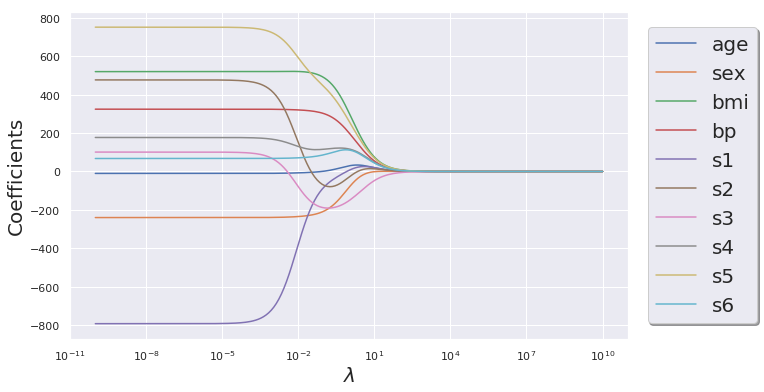

In [12]:
# Note that in scikit-learn they use alpha instead of lambda as a naming convention

n_alphas = 200
alphas = np.logspace(-10, 10, n_alphas)

ridge_coeff = np.zeros((n_alphas, X.shape[1]))

for i in range(len(alphas)):
    ridge = Ridge(alpha= alphas[i], fit_intercept=False)
    ridge.fit(X, y)
    ridge_coeff[i,:] = ridge.coef_

df_ridge_coeff = pd.DataFrame(data = ridge_coeff, columns= df_X.columns.tolist())
plt.figure(figsize=(10,6))
for col in df_ridge_coeff.columns.tolist():
    plt.semilogx(alphas, df_ridge_coeff[col].values, label =F"{col}")
plt.xlabel(r"$\lambda$", fontsize = 20)
plt.ylabel("Coefficients", fontsize = 20)
plt.legend(loc= "right", prop={'size': 20}, bbox_to_anchor=(1.25 , .5), ncol=1, fancybox=True, shadow=True)
plt.show()

In [13]:
df_ridge_coeff.tail()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
195,7.676179e-08,1.759294e-08,2.395937e-07,1.803679e-07,8.662161e-08,7.110945e-08,-1.612908e-07,1.758612e-07,2.311912e-07,1.562633e-07
196,6.090355e-08,1.395841e-08,1.900960e-07,1.431056e-07,6.872642e-08,5.641892e-08,-1.279697e-07,1.395299e-07,1.834293e-07,1.239808e-07
197,4.832146e-08,1.107474e-08,1.508240e-07,1.135414e-07,5.452821e-08,4.476332e-08,-1.015324e-07,1.107044e-07,1.455346e-07,9.836758e-08
198,3.833872e-08,8.786804e-09,1.196652e-07,9.008482e-08,4.326321e-08,3.551565e-08,-8.055678e-08,8.783395e-08,1.154686e-07,7.804579e-08
199,3.041831e-08,6.971536e-09,9.494353e-08,7.147416e-08,3.432545e-08,2.817846e-08,-6.391453e-08,6.968830e-08,9.161387e-08,6.192228e-08


# LASSO Regression

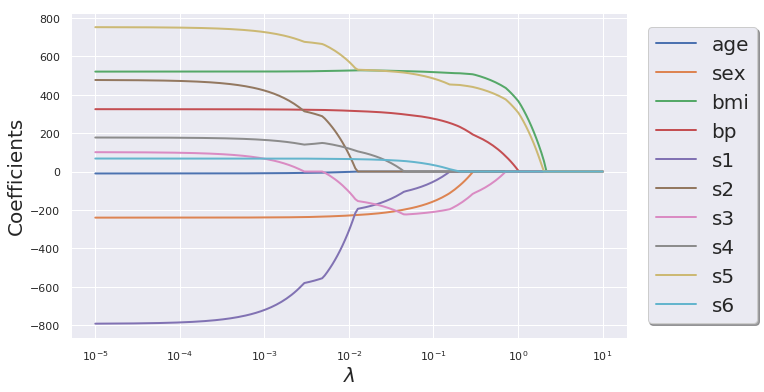

In [14]:
n_alphas = 200
alphas = np.logspace(-5, 1, n_alphas)

lasso_coeff = np.zeros((n_alphas, X.shape[1]))

for i in range(len(alphas)):
    lasso = Lasso(alpha= alphas[i], fit_intercept=True, max_iter=100000)
    lasso.fit(X, y)
    lasso_coeff[i,:] = lasso.coef_

df_lasso_coeff = pd.DataFrame(data = lasso_coeff, columns= df_X.columns.tolist())

import matplotlib as mpl
mpl.rcParams['axes.linewidth'] = 3 
mpl.rcParams['lines.linewidth'] =2
plt.figure(figsize=(10,6))
for col in df_lasso_coeff.columns.tolist():
    plt.semilogx(alphas, df_lasso_coeff[col].values, label =F"{col}")
plt.xlabel(r"$\lambda$", fontsize = 20)
plt.ylabel("Coefficients", fontsize = 20)
plt.legend(loc= "right",prop={'size': 20}, bbox_to_anchor=(1.25 , .5), ncol=1, fancybox=True, shadow=True)
plt.show()

In [15]:
df_lasso_coeff.tail()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
195,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0
196,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0
197,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0
198,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0
199,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0


# Elastic-Net Regression using GLM-NET

In [16]:
def _glmnetCV(X, Y, is_classification = True,
                   n_splits = 4,
                   alpha = 0.5,
                   n_lambda = 100,
                   cut_point = 1,
                   scoring = "roc",
                   random_state = 1367,
                   print_cv = True):
    """
    a function for running glmnet cv for both classification and regression
    
    parameters:
    
    X : set of features
    Y : set of labels/values
    is_classification: a flag which is by default is set to True.
                       For regression problems set it to False
    n_splits : number of cross-validation folds. By default set to 4.
    alpha : the elastic parameter[0,1]. alpha = 0 gives Lasso and alpha = 1 Ridge.
            By default is set to 0.5.
    n_lambda: number of penalty terms. By default is set to 100.
    cut_point : the number of standard error distance between best and maximum lambda
                to select the best lambda. The default is set to 1.
    scoring : a string to set the scoring method:
              for classification : "roc_auc",
                                   "accuracy",
                                   "average_precision",
                                   "precision",
                                   "recall"
              for classification, the defualt is set to "roc_auc".
              
              for regression : "r2",
                               "mean_squared_error",
                               "mean_absolute_error",
                               "median_absolute_error"
              for regression, the defualt is set to "r2".
    random_state : random seed. By default is set to 1367.
    print_cv : a flag to print the mean cv scores. By default is set to True.
               To ignore the print out of the results, set it to False.
    """
    if is_classification:
        model = glmnet.LogitNet(alpha = alpha,
                                n_lambda = n_lambda,
                                n_splits = n_splits,
                                cut_point = cut_point,
                                scoring = scoring,
                                n_jobs = -1,
                                random_state = random_state
                               )
    else:
        model = glmnet.ElasticNet(alpha = alpha,
                                  n_lambda = n_lambda,
                                  n_splits = n_splits,
                                  cut_point = cut_point,
                                  scoring = scoring,
                                  n_jobs = -1,
                                  random_state = random_state
                                 )

    fit = model.fit(X, Y)
    if print_cv:
        for ij in range(len(fit.cv_mean_score_)):
            print(F"{model.n_splits} Folds CV Mean {model.scoring} = {fit.cv_mean_score_[ij]:.2} +/- {fit.cv_standard_error_[ij]:.1}")
    
    return model

In [17]:
def _glmnet_plot_cv_score_lambda(model):
    """
    a function to plot cv scores vs lambda
    parameters:
               model : a fitted glmnet object
    """
    import matplotlib as mpl
    mpl.rcParams['axes.linewidth'] = 3 
    mpl.rcParams['lines.linewidth'] =2
    plt.figure(figsize=(10,6))
    plt.errorbar(-np.log(model.lambda_path_), model.cv_mean_score_, yerr=model.cv_standard_error_ , c = "r", ecolor="k", marker = "o", )
    plt.vlines(-np.log(model.lambda_best_), ymin = min(model.cv_mean_score_) - 0.05 , ymax = max(model.cv_mean_score_) + 0.05, lw = 3, linestyles = "--", colors = "b" ,label = "best $\lambda$")
    plt.vlines(-np.log(model.lambda_max_), ymin = min(model.cv_mean_score_) - 0.05 , ymax = max(model.cv_mean_score_) + 0.05, lw = 3, linestyles = "--", colors = "c" ,label = "max $\lambda$")
    plt.tick_params(axis='both', which='major', labelsize = 12)
    plt.grid(True)
    plt.ylim([min(model.cv_mean_score_) - 0.05, max(model.cv_mean_score_) + 0.05])
    plt.legend(loc = 4, prop={'size': 20})
    plt.xlabel("$-Log(\lambda)$" , fontsize = 20)
    plt.ylabel(F"Mean {model.n_splits} Folds CV {(model.scoring).upper()}", fontsize = 20)
    plt.title(F"Best $\lambda$ = {model.lambda_best_[0]:.2} with {len(np.nonzero(np.reshape(model.coef_, (1,-1)))[1])} Features, $\\alpha$ = {model.alpha}" , fontsize = 20)
    plt.show()

In [18]:
def _glmnet_plot_coeff_path(model, df):
    """
    a function to plot coefficients vs lambda
    parameters:
               model : a fitted glmnet object
               df: in case that the input is the pandas dataframe,
                   the column names of the coeff. will appear as a legend
    """
    import matplotlib as mpl
    mpl.rcParams['axes.linewidth'] = 3 
    mpl.rcParams['lines.linewidth'] =2
    plt.figure(figsize=(10,6))
    if not df.empty:
        for i in list(np.nonzero(np.reshape(model.coef_, (1,-1)))[1]):
            plt.plot(-np.log(model.lambda_path_) ,(model.coef_path_.reshape(-1,model.coef_path_.shape[-1]))[i,:], label = df.columns.values.tolist()[i]);
        plt.legend(loc= "right", bbox_to_anchor=(1.2 , .5), ncol=1, fancybox=True, shadow=True)

    else:
        for i in list(np.nonzero(np.reshape(model.coef_, (1,-1)))[1]):
            plt.plot(-np.log(model.lambda_path_) ,(model.coef_path_.reshape(-1,model.coef_path_.shape[-1]))[i,:]);
            
    plt.tick_params(axis='both', which='major', labelsize = 12)    
    plt.ylabel("Coefficients", fontsize = 20)
    plt.xlabel("-$Log(\lambda)$", fontsize = 20)
    plt.title(F"Best $\lambda$ = {model.lambda_best_[0]:.2} with {len(np.nonzero(np.reshape(model.coef_, (1,-1)))[1])} Features, $\\alpha$ = {model.alpha}" , fontsize = 20)
    plt.grid(True)
    plt.show()

In [19]:
def _glmnet_coeff(model, df):
    """
    a function to print the coefficients of glmnet model
    Input:
         model : fitted glmnet model
         df : dataframe to have access to column names

    """
    df_nonzero = df.iloc[:, np.nonzero(np.reshape(model.coef_, (-1,1)))[0]]
    df_coeff = pd.DataFrame(data = model.coef_[np.nonzero(np.reshape(model.coef_, (-1,1)))[0]],  index= df_nonzero.columns)
    df_coeff.sort_values(by = 0, ascending=False)
    
    return df_coeff
    

In [20]:
def _glmnet_plot_cv_score_alpha(X, Y, is_classification = True,
                                n_splits = 4,
                                n_lambda = 100,
                                cut_point = 1,
                                scoring = "roc",
                                random_state = 1367,
                                print_cv = True):
    """
    a function for running glmnet cv for both classification and regression for a range of alpha
    it outputs the best cv score with the number of non-zero coefficients
    parameters:
    
    X : set of features
    Y : set of labels/values
    is_classification: a flag which is by default is set to True.
                       For regression problems set it to False
    n_splits : number of cross-validation folds. By default set to 4.
    n_lambda: number of penalty terms. By default is set to 100.
    cut_point : the number of standard error distance between best and maximum lambda
                to select the best lambda. The default is set to 1.
    scoring : a string to set the scoring method:
              for classification : "roc_auc",
                                   "accuracy",
                                   "average_precision",
                                   "precision",
                                   "recall"
              for classification, the defualt is set to "roc_auc".
              
              for regression : "r2",
                               "mean_squared_error",
                               "mean_absolute_error",
                               "median_absolute_error"
              for regression, the defualt is set to "r2".
    random_state : random seed. By default is set to 1367.
    print_cv : a flag to print the mean cv scores. By default is set to True.
               To ignore the print out of the results, set it to False.
    """    
    alpha_list = np.arange(0.01, 1.0, 0.01)
    mean_score = []
    std_score = []
    n_features = []
    
    if is_classification:
        for alpha in alpha_list:
            model = glmnet.LogitNet(alpha = alpha,
                                    n_lambda = n_lambda,
                                    n_splits = n_splits,
                                    cut_point = cut_point,
                                    scoring = scoring,
                                    n_jobs = -1,
                                    random_state = random_state
                                   )
            model.fit(X, Y)
            mean_score.append(model.cv_mean_score_[model.lambda_best_inx_])
            std_score.append(model.cv_standard_error_[model.lambda_best_inx_])
            n_features.append(len(np.nonzero(np.reshape(model.coef_, (-1,1)))[0]))
    else:
        for alpha in alpha_list:
            model = glmnet.ElasticNet(alpha = alpha,
                                      n_lambda = n_lambda,
                                      n_splits = n_splits,
                                      cut_point = cut_point,
                                      scoring = scoring,
                                      n_jobs = -1,
                                      random_state = random_state
                                     )
            model.fit(X, Y)
            mean_score.append(model.cv_mean_score_[model.lambda_best_inx_])
            std_score.append(model.cv_standard_error_[model.lambda_best_inx_])
            n_features.append(len(np.nonzero(np.reshape(model.coef_, (-1,1)))[0]))
    
    # Plotting the results
    import matplotlib as mpl
    mpl.rcParams['axes.linewidth'] = 3 
    mpl.rcParams['lines.linewidth'] =2
    plt.figure(figsize=(30,6))

    plt.subplot(1,2,1)
    plt.errorbar(alpha_list, mean_score, yerr = std_score, c = "r", ecolor="k", marker = "o", )
    plt.tick_params(axis='both', which='major', labelsize = 12)
    plt.xlabel(r"$\alpha$" , fontsize = 20)
    plt.ylabel(F"Mean {model.n_splits} Folds CV {model.scoring}", fontsize = 20)
    plt.grid(True)

    plt.subplot(1,2,2)
    plt.plot(alpha_list, n_features, c = "r",  marker = "o", )
    plt.tick_params(axis='both', which='major', labelsize = 12)
    plt.xlabel(r"$\alpha$" , fontsize = 20)
    plt.ylabel("Number of Features", fontsize = 20)
    plt.grid(True)

    plt.show()

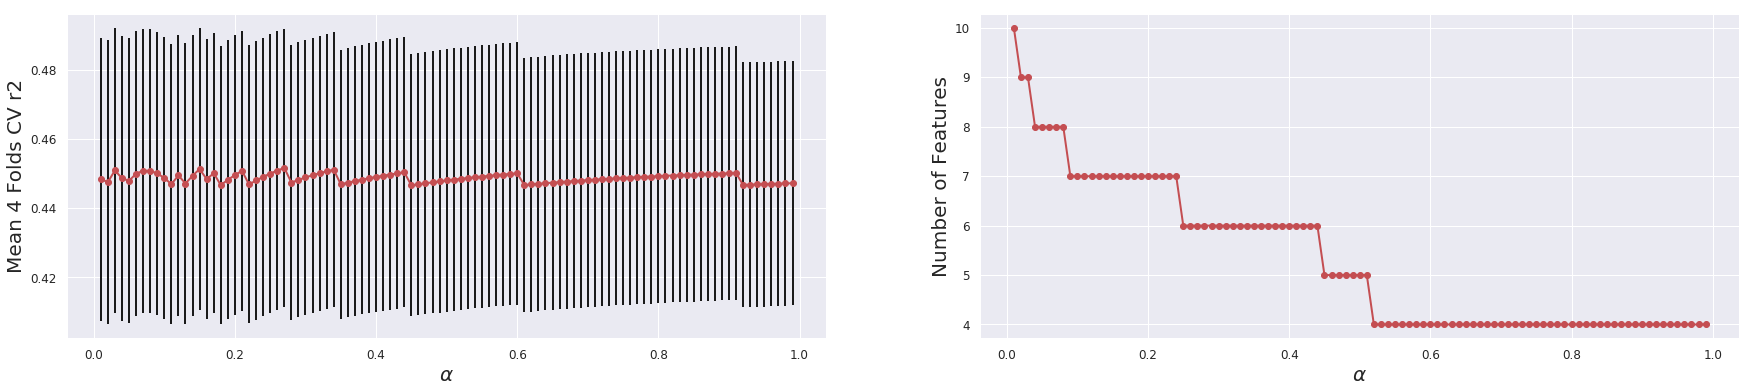

In [21]:
_glmnet_plot_cv_score_alpha(X, y, is_classification=False, scoring="r2")

In [22]:
glmnet_model = _glmnetCV(X, y, is_classification = False, scoring="r2", n_splits=10, alpha=0.5)

10 Folds CV Mean r2 = -0.034 +/- 0.02
10 Folds CV Mean r2 = 0.0079 +/- 0.02
10 Folds CV Mean r2 = 0.061 +/- 0.02
10 Folds CV Mean r2 = 0.11 +/- 0.02
10 Folds CV Mean r2 = 0.15 +/- 0.02
10 Folds CV Mean r2 = 0.19 +/- 0.03
10 Folds CV Mean r2 = 0.22 +/- 0.03
10 Folds CV Mean r2 = 0.26 +/- 0.03
10 Folds CV Mean r2 = 0.28 +/- 0.03
10 Folds CV Mean r2 = 0.31 +/- 0.03
10 Folds CV Mean r2 = 0.33 +/- 0.03
10 Folds CV Mean r2 = 0.35 +/- 0.03
10 Folds CV Mean r2 = 0.37 +/- 0.03
10 Folds CV Mean r2 = 0.38 +/- 0.03
10 Folds CV Mean r2 = 0.39 +/- 0.04
10 Folds CV Mean r2 = 0.4 +/- 0.04
10 Folds CV Mean r2 = 0.41 +/- 0.04
10 Folds CV Mean r2 = 0.42 +/- 0.04
10 Folds CV Mean r2 = 0.42 +/- 0.04
10 Folds CV Mean r2 = 0.43 +/- 0.04
10 Folds CV Mean r2 = 0.43 +/- 0.04
10 Folds CV Mean r2 = 0.43 +/- 0.04
10 Folds CV Mean r2 = 0.44 +/- 0.04
10 Folds CV Mean r2 = 0.44 +/- 0.04
10 Folds CV Mean r2 = 0.45 +/- 0.04
10 Folds CV Mean r2 = 0.45 +/- 0.04
10 Folds CV Mean r2 = 0.45 +/- 0.04
10 Folds CV Mean r2 = 0.

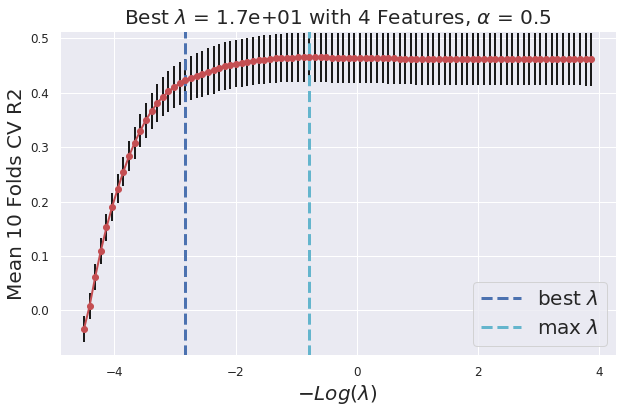

In [23]:
_glmnet_plot_cv_score_lambda(glmnet_model)

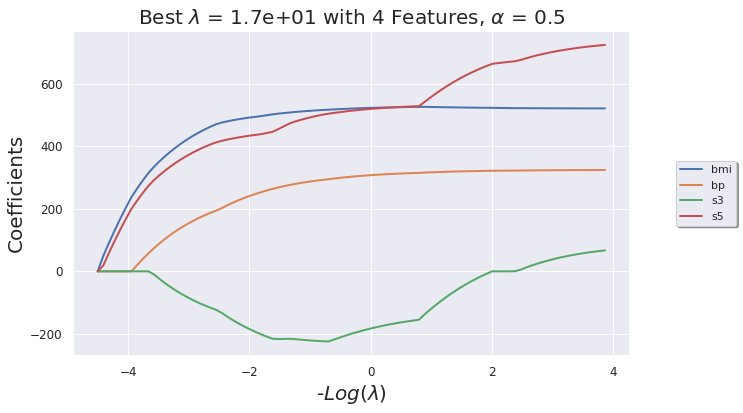

In [24]:
_glmnet_plot_coeff_path(glmnet_model, df_X)

In [25]:
df_glment_coeff = _glmnet_coeff(glmnet_model, df_X)
df_glment_coeff

,0
bmi,444.032048
bp,171.000669
s3,-101.325339
s5,389.635151
